<a href="https://colab.research.google.com/github/yaswanth02-04/python-data-types/blob/main/Wine_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("/content/wine-clustering.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,14.05,3.24,2.20,18.3,1.04,3.89,0.51,2.37,7.43,0.80,2.46,90.0,352.0
1,13.00,3.20,2.49,16.5,2.46,1.92,0.22,0.83,1.98,1.07,4.34,104.0,813.0
2,11.90,2.98,2.32,20.1,3.13,1.72,0.45,1.02,4.54,0.83,0.67,90.0,199.0
3,11.89,1.36,2.51,21.0,1.63,2.57,0.16,0.94,8.49,0.83,3.46,86.0,820.0
4,13.15,1.89,2.47,26.0,1.30,3.83,0.34,1.38,3.07,0.97,2.80,108.0,1188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64815,12.57,2.57,2.47,15.9,2.51,1.93,0.33,0.99,2.81,1.15,3.03,102.0,1620.0
64816,13.49,3.71,2.70,21.9,2.61,1.01,0.18,1.93,4.81,1.03,2.03,79.0,413.0
64817,13.41,3.99,2.27,25.3,1.86,3.63,0.55,2.08,6.34,1.44,1.16,110.0,805.0
64818,12.88,2.45,2.54,22.7,2.45,1.41,0.54,2.14,6.35,1.13,3.07,86.0,1214.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64820 entries, 0 to 64819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               64820 non-null  float64
 1   Malic_Acid            64820 non-null  float64
 2   Ash                   64820 non-null  float64
 3   Ash_Alcanity          64820 non-null  float64
 4   Total_Phenols         64820 non-null  float64
 5   Flavanoids            64820 non-null  float64
 6   Nonflavanoid_Phenols  64820 non-null  float64
 7   Proanthocyanins       64820 non-null  float64
 8   Color_Intensity       64820 non-null  float64
 9   Hue                   64820 non-null  float64
 10  OD280                 64819 non-null  float64
 11  Magnesium             64819 non-null  float64
 12  Proline               64819 non-null  float64
dtypes: float64(13)
memory usage: 6.4 MB


In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,14.05,3.24,2.20,18.3,1.04,3.89,0.51,2.37,7.43,0.80,2.46,90.0,352.0
1,13.00,3.20,2.49,16.5,2.46,1.92,0.22,0.83,1.98,1.07,4.34,104.0,813.0
2,11.90,2.98,2.32,20.1,3.13,1.72,0.45,1.02,4.54,0.83,0.67,90.0,199.0
3,11.89,1.36,2.51,21.0,1.63,2.57,0.16,0.94,8.49,0.83,3.46,86.0,820.0
4,13.15,1.89,2.47,26.0,1.30,3.83,0.34,1.38,3.07,0.97,2.80,108.0,1188.0


In [6]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
64815,12.57,2.57,2.47,15.9,2.51,1.93,0.33,0.99,2.81,1.15,3.03,102.0,1620.0
64816,13.49,3.71,2.70,21.9,2.61,1.01,0.18,1.93,4.81,1.03,2.03,79.0,413.0
64817,13.41,3.99,2.27,25.3,1.86,3.63,0.55,2.08,6.34,1.44,1.16,110.0,805.0
64818,12.88,2.45,2.54,22.7,2.45,1.41,0.54,2.14,6.35,1.13,3.07,86.0,1214.0
64819,11.51,0.88,2.43,15.3,2.20,2.41,0.28,1.35,6.02,1.04,NaN,NaN,NaN


In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
count,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64820.000000,64819.000000,64819.000000,64819.000000
mean,13.006597,2.352573,2.367241,19.488622,2.296562,2.043327,0.361774,1.592874,5.096440,0.956569,2.614594,99.328191,748.700504
std,0.813086,1.084555,0.274949,3.336694,0.624619,0.967204,0.123811,0.570218,2.266975,0.228630,0.713847,14.271417,311.608037
min,9.500000,0.000000,1.210000,5.500000,0.010000,0.000000,0.000000,0.000000,0.000000,0.030000,0.010000,42.000000,0.000000
25%,12.460000,1.590000,2.180000,17.200000,1.880000,1.360000,0.280000,1.200000,3.500000,0.800000,2.130000,90.000000,534.000000
50%,13.010000,2.340000,2.370000,19.500000,2.300000,2.020000,0.360000,1.590000,5.080000,0.960000,2.610000,99.000000,747.000000
75%,13.550000,3.090000,2.550000,21.700000,2.720000,2.710000,0.450000,1.980000,6.640000,1.110000,3.100000,109.000000,961.000000
max,16.140000,7.440000,3.530000,34.000000,4.920000,6.220000,0.960000,4.170000,15.640000,1.960000,5.680000,158.000000,2066.000000


In [8]:
df.shape

(64820, 13)

In [9]:
df.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64815,False,False,False,False,False,False,False,False,False,False,False,False,False
64816,False,False,False,False,False,False,False,False,False,False,False,False,False
64817,False,False,False,False,False,False,False,False,False,False,False,False,False
64818,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0
Hue,0


In [11]:
df[df.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Magnesium,Proline


<Axes: xlabel='Alcohol', ylabel='Count'>

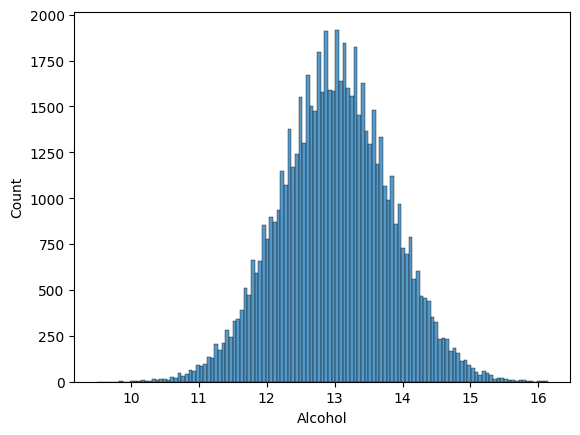

In [12]:
sns.histplot(x=df['Alcohol'])

<Axes: xlabel='Malic_Acid', ylabel='Count'>

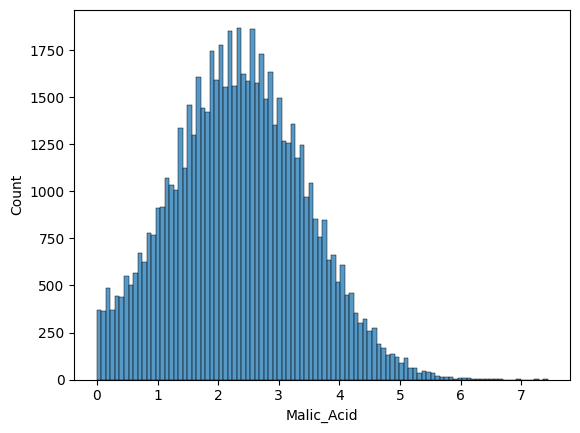

In [13]:
sns.histplot(x=df['Malic_Acid'])

<Axes: xlabel='Ash', ylabel='Count'>

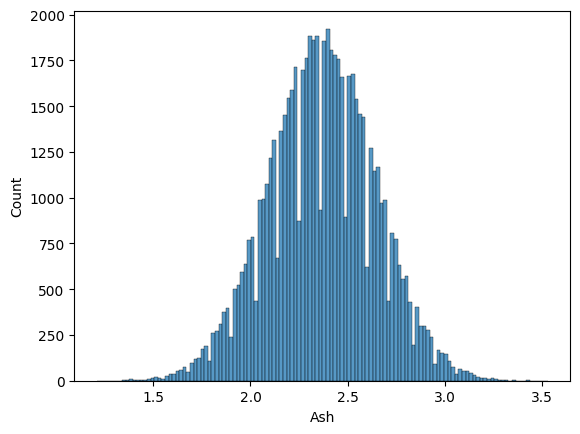

In [14]:
sns.histplot(x=df['Ash'])

<Axes: xlabel='Ash_Alcanity', ylabel='Count'>

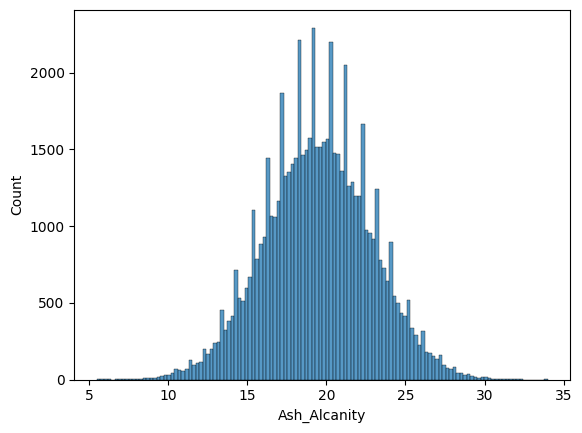

In [15]:
sns.histplot(x=df['Ash_Alcanity'])

<Axes: xlabel='Total_Phenols', ylabel='Count'>

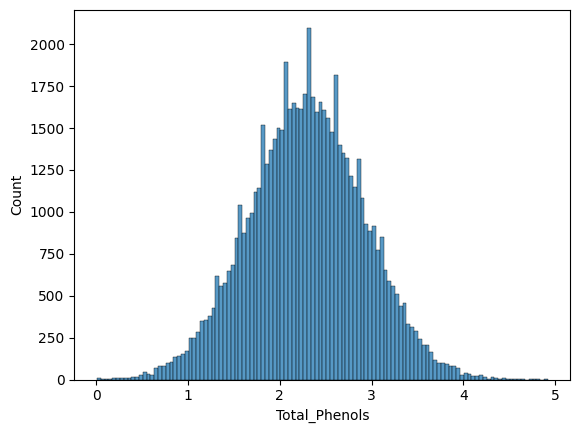

In [16]:
sns.histplot(x=df['Total_Phenols'])

<Axes: xlabel='Flavanoids', ylabel='Count'>

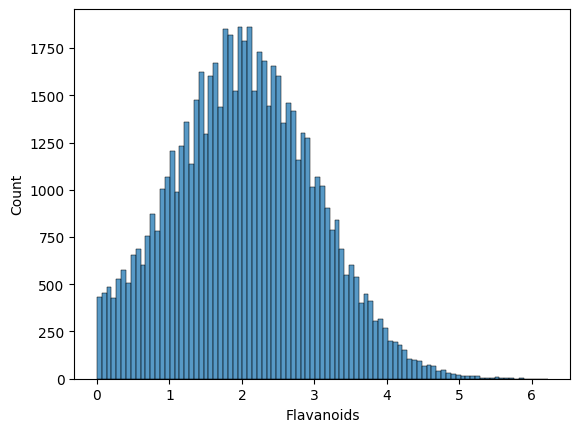

In [17]:
sns.histplot(x=df['Flavanoids'])

<Axes: xlabel='Nonflavanoid_Phenols', ylabel='Count'>

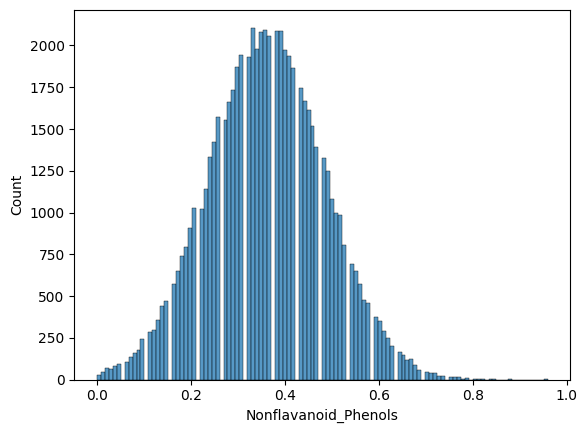

In [18]:
sns.histplot(x=df['Nonflavanoid_Phenols'])

<Axes: xlabel='Proanthocyanins', ylabel='Count'>

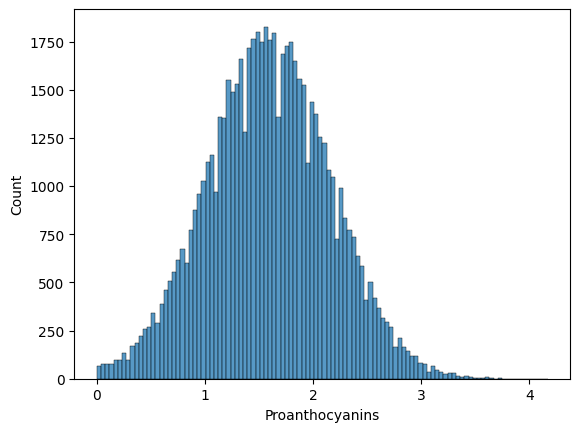

In [19]:
sns.histplot(x=df['Proanthocyanins'])

<Axes: xlabel='Color_Intensity', ylabel='Count'>

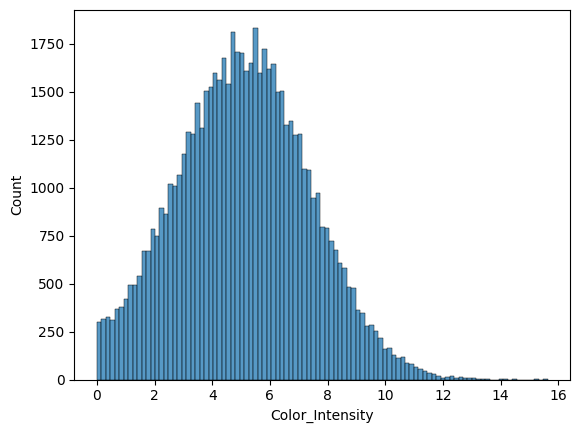

In [20]:
sns.histplot(x=df['Color_Intensity'])

<Axes: xlabel='Hue', ylabel='Count'>

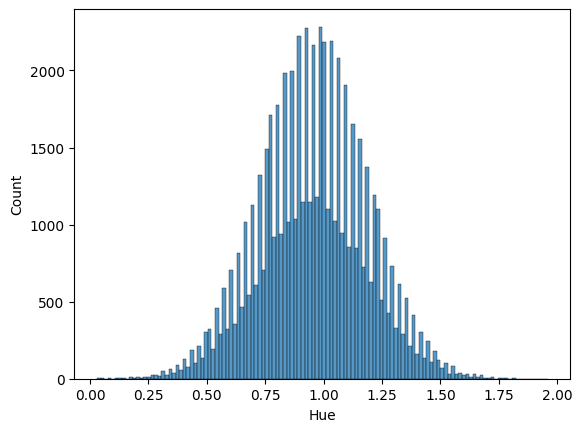

In [21]:
sns.histplot(x=df['Hue'])

<Axes: xlabel='OD280', ylabel='Count'>

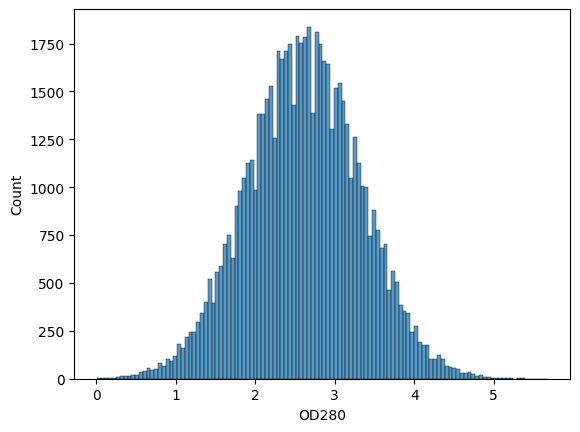

In [22]:
sns.histplot(x=df['OD280'])

<Axes: xlabel='Magnesium', ylabel='Count'>

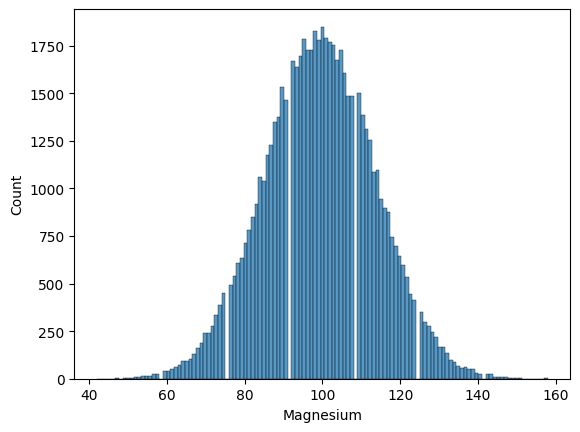

In [23]:
sns.histplot(x=df['Magnesium'])

<Axes: xlabel='Proline', ylabel='Count'>

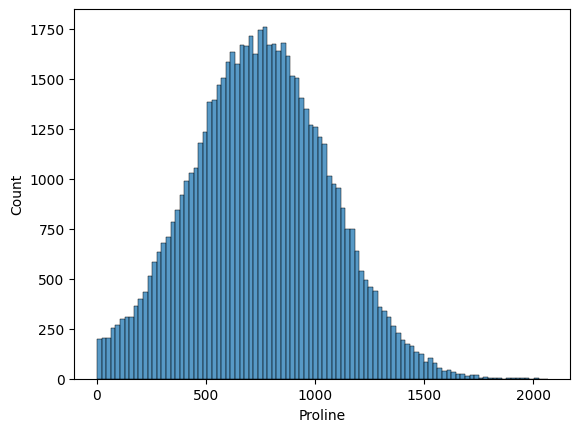

In [24]:
sns.histplot(x=df['Proline'])

<Axes: xlabel='Alcohol'>

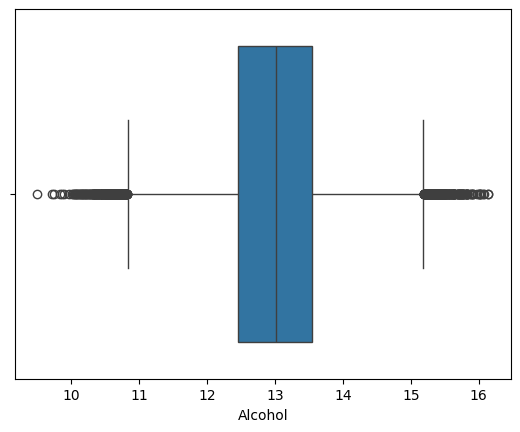

In [25]:
sns.boxplot(x=df['Alcohol'])

<Axes: xlabel='Malic_Acid'>

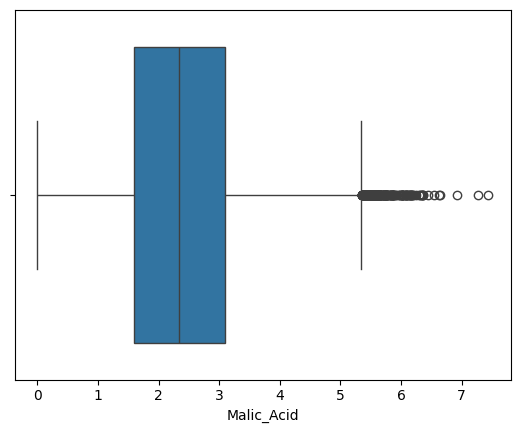

In [26]:
sns.boxplot(x=df['Malic_Acid'])

<Axes: xlabel='Ash'>

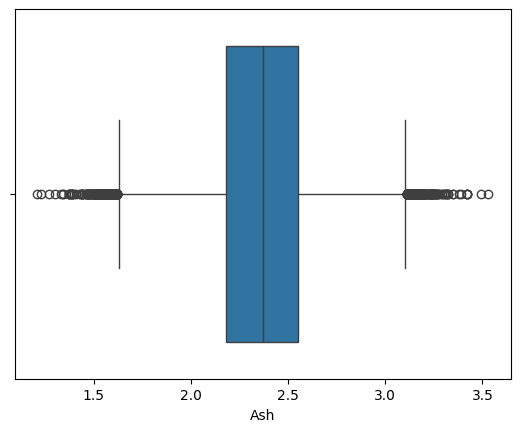

In [27]:
sns.boxplot(x=df['Ash'])

<Axes: xlabel='Ash_Alcanity'>

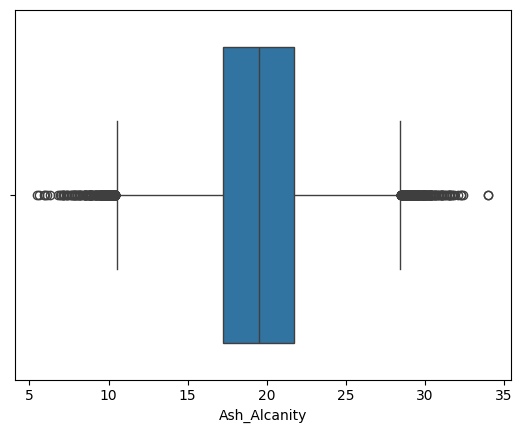

In [28]:
sns.boxplot(x=df['Ash_Alcanity'])

<Axes: xlabel='Total_Phenols'>

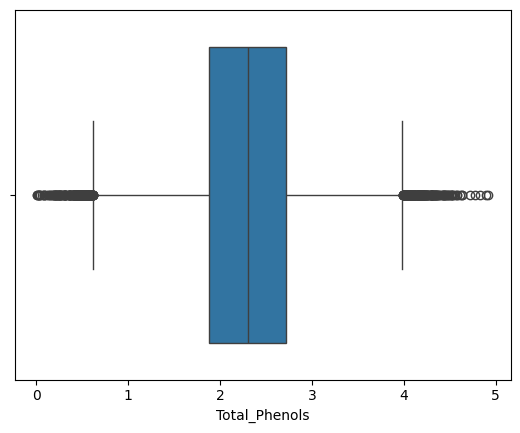

In [29]:
sns.boxplot(x=df['Total_Phenols'])

<Axes: xlabel='Flavanoids'>

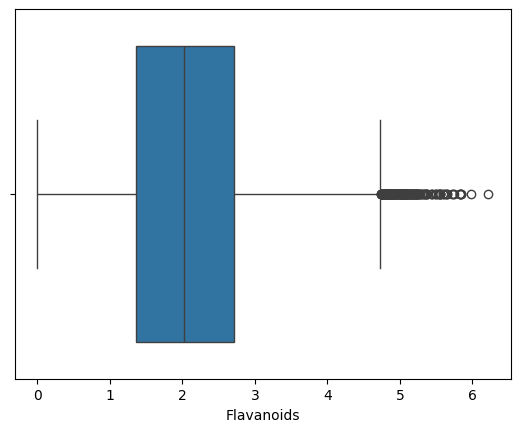

In [30]:
sns.boxplot(x=df['Flavanoids'])

<Axes: xlabel='Nonflavanoid_Phenols'>

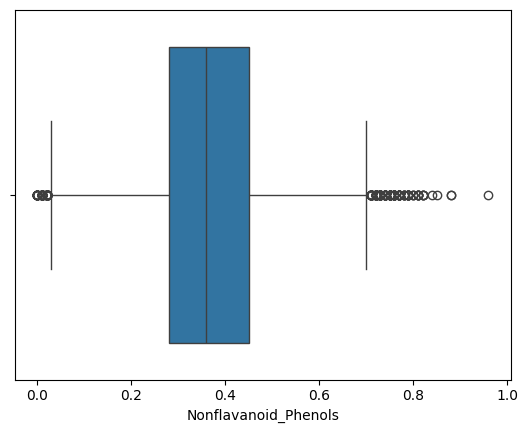

In [31]:
sns.boxplot(x=df['Nonflavanoid_Phenols'])

<Axes: xlabel='Proanthocyanins'>

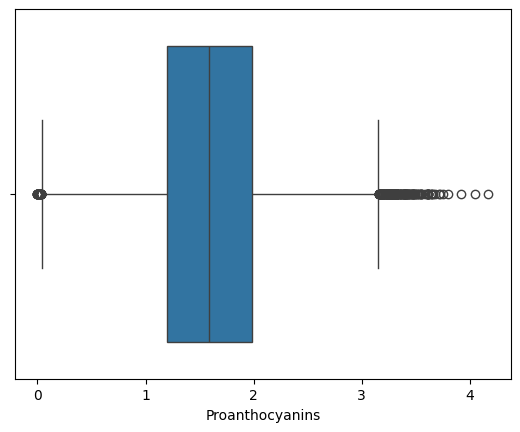

In [32]:
sns.boxplot(x=df['Proanthocyanins'])

<Axes: xlabel='Color_Intensity'>

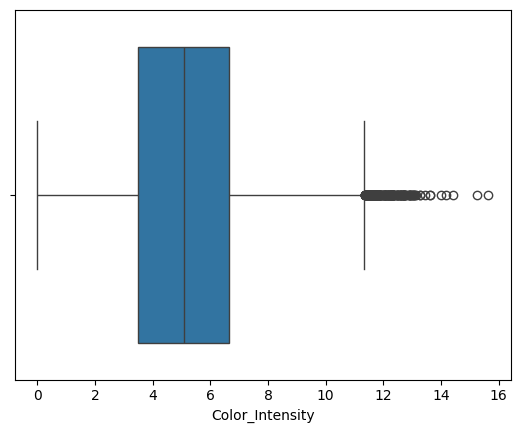

In [33]:
sns.boxplot(x=df['Color_Intensity'])

<Axes: xlabel='Hue'>

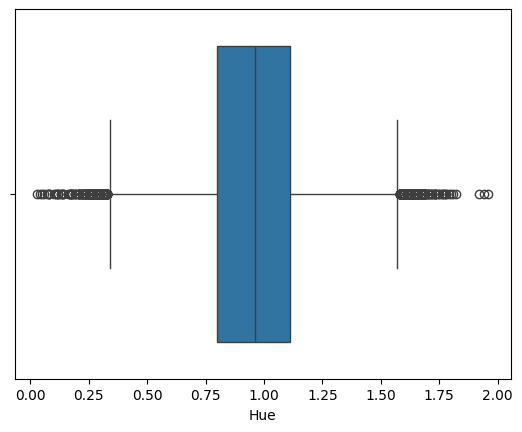

In [34]:
sns.boxplot(x=df['Hue'])

<Axes: xlabel='OD280'>

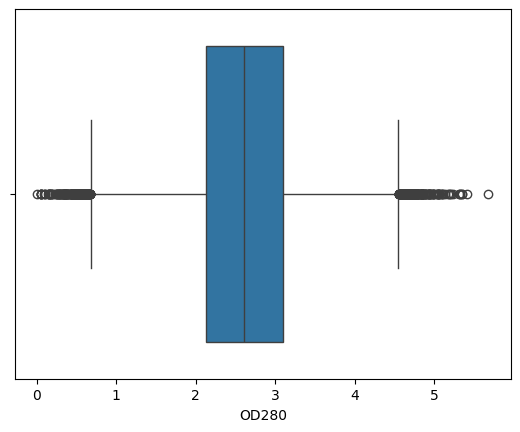

In [35]:
sns.boxplot(x=df['OD280'])

<Axes: xlabel='Magnesium'>

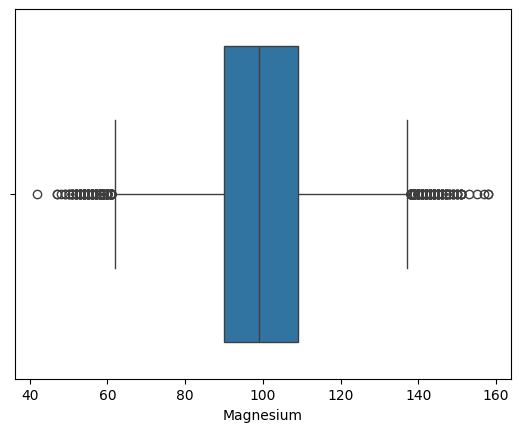

In [36]:
sns.boxplot(x=df['Magnesium'])

<Axes: xlabel='Proline'>

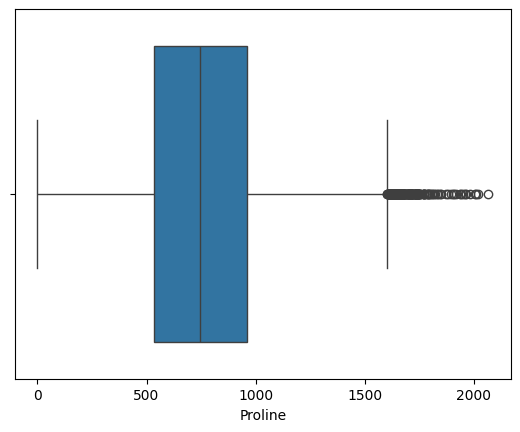

In [37]:
sns.boxplot(x=df['Proline'])